In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data', index_col =0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scale = StandardScaler()

In [12]:
scale.fit(df.drop("TARGET CLASS", axis = 1))
#Fit all the data in scaler object except the target class column

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
#Transfromation
scaled_features = scale.transform(df.drop("TARGET CLASS", axis = 1))
#transfrom method standardizationby centering and scaling the data

In [14]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [18]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [21]:
df_feat.head()
#Now e=we have Standardized version of our data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [22]:
# NOw we are ready to put our data to fit inot KNN algorithms
#Now we will split our our data into training and test data

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_feat
# Or X=scaled_features()
y = df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
#Now lets do some prediction
pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix


In [60]:
y_test

545    0
298    0
109    0
837    0
194    0
605    0
246    1
693    1
802    0
406    1
824    1
977    0
742    0
341    1
601    0
319    1
121    1
299    1
32     1
269    1
887    0
668    1
820    0
754    1
731    1
225    0
569    0
56     0
408    1
734    0
      ..
532    0
866    0
555    0
716    0
81     1
756    0
796    1
612    0
699    1
915    1
801    0
729    0
577    1
260    0
938    0
389    0
476    0
202    1
442    1
113    0
620    0
550    0
27     1
720    1
945    1
847    0
682    1
884    1
325    1
482    0
Name: TARGET CLASS, Length: 300, dtype: int64

In [59]:
len(X_test)

300

In [58]:
len(pred)

300

In [38]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [39]:
#we are using elbow method to choose the best value of k

In [40]:
error_rate=[] #Empty list
# I am going to iterate thorugh many values of K (many models)and plot the error rate graph and see which one has lowest error rate

In [43]:
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    # Average error rate (Avearge where my pred are not equals to actual test value) 

Text(0,0.5,'Error rate')

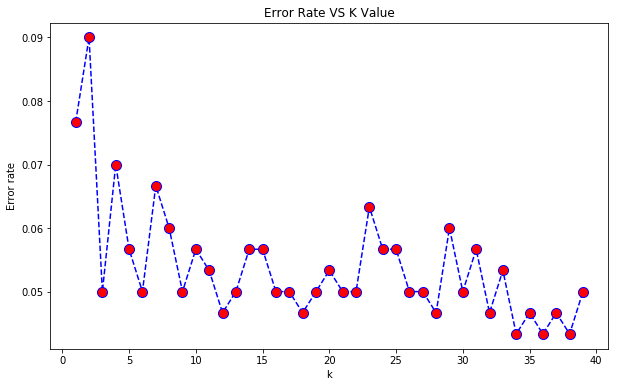

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color ='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate VS K Value")
plt.xlabel('k')
plt.ylabel('Error rate')

In [53]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

[[154   5]
 [  7 134]]


             precision    recall  f1-score   support

          0       0.96      0.97      0.96       159
          1       0.96      0.95      0.96       141

avg / total       0.96      0.96      0.96       300



In [ ]:
#KNN project Overview 
#